# Part 3 - Modified Gravity Parameters

Winn Koster    |    Haverford Class of 2018    |    winnkoster@gmail.com


In the last notebook we gained a familiarity with the basic parameters that make up the CMB power spectrum (eg: $H_0, \ \Omega_b$, etc.). Although we didn't discuss it in detail, it should now be clear that we may infer best fit numerical values for each of these parameters, as well as the uncertainties in these values, by comparing outputs in a Boltzmann code to observed measurements from instruments such as *Planck*.

In this notebook, we will (briefly) introduce some of the theoretical backing for New Higgs Inflation, and then perform the same kind of analysis we did in the previous notebook, for our new modified gravity parameters. In the following notebook, we will concern ourselves with the *uncertainties* in our simulations, and ask the question "how well do we know what we think we know?"

## A (very brief) Theoretical Introduction to New Higgs Inflation

We have already review cosmic inflation in the first notebook, and you presumably have some understanding from class. So you should already have a sense for *what* inflation is; now we're going to briefly discuss the *how*. The overwhelming majority of inflation models require some yet-to-be-identified particle to guide the dynamics of inflaiton, defining the start and end. Astrophysicists are cheeky and decided to name this hypothetical particle the "Inflaton" to be extra confusing. In the next few paragraphs, I'm going to attempt to summarize several decades worth of astrophysics and particle physics research. This should give some context, but I highly reccomend that you find some papers and read them. I'll reccomend a few at the end of this section.

After the discovery of the Higgs boson in 2012, a lot of people said, "hey, what if the Higgs is the inflaton?" We can infer a lot about what properties the inflaton must have -- if it exists. I won't go into the details here, but things like the cosmic horizon distance (tied to $H_0$ and the first peak of the CMB) and the scalar spectral index ($n_s$, which is roughly a measure of how sloped or flat the CMB is) constrain the details of how inflation took place, which in turn constrains properties of the inflaton. And shortly after the discovery of the Higgs, people realized that the Higgs could *not* work as the inflaton. The properties of the Higgs observed in particle physics and the properties required for astrophysics simply didn't fit together. This is (in hindsight) referred to as Old Higgs Inflation.

Obviously, that's not the end of the story, or else you wouldn't be here working on this project. What people determined was that the *minimally coupled* Higgs (ie: the sort of "regular" Higgs you'd find in the relatively low energy world of the Large Hadron Collider) was not a candidate. But what about a more energetic Higgs that is non-niminally coupled? The LHC is a very powerful particle accelerator, with an energy scale of about 8 TeV, but this is a drop in the bucket compared to the incredible energy scales of the early universe. At millions or more TeV the physics might be different. This is New Higgs Inflation theory: the non-minimally coupled Higgs boson as an inflaton candidate.

Part of the reason this is such a difficult question is because nobody really knows what the physics looks like at such high energy scales. It's sort of this catch 22 where to understand inflation, we need to understand how the physics works at such high energies, but to understand the physics at such high energies, we need to have an understanding of inflation. With that being said, let's delve into some of the theory behind New Higgs Inflation, and see why it requires this divergence from General Relativity that I mentioned earlier.

### Fluid Equation and Einstein Field Equation
Before we begin, I want to let you know that you probably won't get this the first time through if you haven't yet studied GR and cosmology. __[There really isn't a perfect way to teach this subject](https://xkcd.com/895/)__, because you are inevitably going to be too simple or too complicated. I'll try to stay on the simple side of things, but give a little taste of the math. If this is your first time encountering GR, I'd encourage you to read this [NY Times article](https://www.nytimes.com/2015/11/24/science/a-century-ago-einsteins-theory-of-relativity-changed-everything.html) after you finish this cell, as it provides both historical context and just enough science to help you make sense of all the math you're about to see.


I have previously mentioned that Boltzmann Codes work by numerically solving fluid equations and Einstein equations. Let us now actually discuss what that entails. The Einstein equation (without cosmological constant) is expressed below. 

$G_{\mu \nu} \ = \ \frac{8 \pi G}{c^4} T_{\mu \nu}$

Generally speaking, the lefthand side is curvature and the righthand side is energy and/or mass. So plug in the mass, and you learn how it curves spacetime. Or plug in the spacetime curvature, and you learn something about the mass distribution. $G_{\mu \nu}$ is the Einstein Tensor, and $T_{\mu \nu}$ is the Stress-Energy tensor; we will play around with the specifics shortly. If we wanted to add the cosmological constant, you'd just add $\Lambda_{\mu \nu}$ to the lefthand side, but in the early universe dark energy can be safely ignored; I believe Camb just omits the term altogether (don't quote me on that). Anyway, this is it. Just about all of General Relativity can be summed up by solving this equation in one form or another.

Of course, $G_{\mu \nu}$ and $T_{\mu \nu}$ can be simple, or not, which is what makes this so difficult. The next thing I want to point out, which I've been ignoring up to now, is that the Einstein equation isn't one equation, it's sixteen. The equation uses *tensors*, which, if you haven't heard of them before, are just matrices with a fancy name. The matrix is 4x4, with three space coordinates and one time coordinate. So the true equation looks something like this (or [this](https://www.google.com/search?client=firefox-b-1-ab&biw=1647&bih=826&tbm=isch&sa=1&ei=3ttEW4CsI-2l_QaqiarIAw&q=einstein+field+equations+fully+written+out&oq=einstein+field+equations+fu&gs_l=img.1.0.0.7907.8191.0.9357.2.2.0.0.0.0.122.202.1j1.2.0....0...1c.1.64.img..0.2.202....0.hR7vEF29ykg)):

<img src="Images/efe_matrix.png" alt="Matrix Equation" title="EFE_matrix" style="width: 500px"/>

Or, as a series of line elements:

<img src="Images/efe_lines.png" alt="Line Elements" title="EFE_lines" style="width: 150px"/>

This is where things get tricky: there are sixteen different equations that all follow various laws of physics and interact with each other as energy shapes the curvature, but then the curvature causes the energy to flow through the system, once again altering the curvature. So you get this kind of feedback where the energy flows throughout the system because of the curvature, but the curvature is determined by the distribution of the energy.

And thus far, this is a purely mathematical exercise. We've set two matrices equal to each other, but haven't bothered to define what goes into them. Now, we kind of build up the system with laws of physics: (again, this is the simple version).

* Conservation of momentum, for example, requires that $T_{ab} = T_{ba}$ for any two numbers in the index, $a,b$. So if I have momentum in the x direction flowing into the y direction, and then go back the other way from y to x, I better have the same amount of momentum in the system that I started with.
* Since the early universe is well approxomated by a fluid, we can use the fluid tensor for the stress energy tensor, giving the following, where the variables are density and pressure:

<img src="Images/fluid_tensor.png" alt="Fluid Tensor" title="Fluid Tensor" style="width: 250px"/>

* We expect the curvature in universe to resemble a Friedmann-Lemaitre-Robertson-Walker (FLRW) metric, so we can set $G_{\mu \nu}$ from this line element (note that it's not a direct substitution, some assembly required):$^*$


<img src="Images/flrw_line_element.png" alt="FLRW Metric" title="FLRW Metric" style="width: 600px"/>


This is obviously not an exhaustive list, but this should show how we start with the most general mathematical form of the Einstein equation, and then build up our model universe from scratch by adding things like gravitation, conservation of energy, fluid dynamics, etc. These sixteen equations have some symmetries, so it ends up being 6 coupled differential equations in the end, which you can either solve by hand or numerically. Solving the 00 component using the definitions for Einstein and Stress-Energy tensors above, for example, will yeild the Friedmann equation (consult any cosmology textbook for a proof).$^{**}$ Solving all of them will yeild more complex equations for the dynamics of the universe. If we then insert some numbers, we can have the Boltzmann code generate a model CMB.




 

 
 
  



*$^*$ If you haven't seen this before, it's a line element, which are common in GR. Instead of writing out the big blocky matrix (which usually contains a lot of zeros -- see fluid tensor above if you don't believe me) you just write out the relevant parts in a line. Here, anything with $d\tau^2$ goes in the 00 component, $dr^2$ in the 11 component, $d\theta^2$ in 22, and $d\phi^2$ in 33. There are not any cross terms (ie: off diagonal elements) in the line element above, but there could be. Black hole line elements, for example, have some cross terms so you might have $d\tau dr$ instead of $dr^2$ or $d\tau^2$. These would go in the off diagonal comonents 01 and 10.*

*$^{**}$ Of course, if we used a different line element we would get different results. If we added, say, the cosmological constant to the lefthand side, we would get a modified Friedmann equation with a dark energy contribution. If we wanted to see what the universe looked like if energy were not conserved, we could use a weird non-symmetrical stress energy tensor and just crank through the equations and see what we end up with. For gravitational waves, we just use a completely different $G_{\mu \nu}$ that represents two massive bodies orbiting each other (complicated) and the stress energy tensor for a vacuum (easy) and get completely different equations of motion using the exact same process. All this is to point out that GR is a very complete theory, and can be used to solve all kinds of systems.*



### Results of the Einstein Field Equations
So we've built our physical system using all of our favorite laws of physics and cranked it through the Einstein Field Equations (EFE) ($G_{\mu \nu} \ = \ \frac{8 \pi G}{c^4} T_{\mu \nu}$ again). We have a few coupled equations, which we can combine into equations of motion. For our system, we are left with two very important equations, below. I'm skipping over how we got here exactly, consult a GR textbook or cosmology theory paper. For now, you'll have to take my word that we can boil down the EFE into just this.

<img src="Images/poisson.png" alt="Poisson" title="Poisson" style="width: 400px"/>

These equations are in Fourier space, so $k$ is the wave number. $G$ is the good old Newtonian Gravitational Constant, $a$ is the scale factor of the universe, and $i$ is the matter species ($i = $ baryonic matter, photons, dark matter, neutrinos, etc.). So we sum across all types of matter, adding up their densities. In the second equation, there is also a term, $\sigma_i$, which represents the shear, or anisotropy of the fluid system.

I skipped over $\Phi$ and $\Psi$ in the last paragraph because they will take a little more explaining: These are the **spacelike and timelike gravitational potentials** due to mass perturbations. These metric potentials are sometimes referred to as the Bardeen Potentials. So say there's a smooth distrubution of matter throughout the universe, then the potential energy doesn't appreciably change. But add some point sources (stars, or even galaxies), and the landscape of $\Phi(\vec x)$ and $\Psi (\vec x)$ changes. If you've taken any GR, you may recognize that the first equation may be simplified as the static weak field metric. If you haven't, just notice that the potential energy is a negative number that scales with an increase in density (mass). If you take this expression and solve the Euler-Lagrange equation, you can get good old $\ddot x \ = \ -\frac{GM}{x^2} \hat x$.

So $\Phi$ is just the spacelike Newtonian Gravitational Potential, and $\Psi$ is its timelike cousin that arises only in General Relativity because space and time are on the same footing as four dimensional spacetime. To maintain the equivalence principle, regular General Relativity requires that $\Phi = \Psi$. You may notice that this sets the second equation above to zero.

Remember that anisotropic pressure term, $\sigma_i$? It turns out that in the New Higgs Inflation case, $\sigma_i \neq 0$. There is some shear stress on the fluid in the early universe from the Higgs. And that's bad news for the equivalence principle. If $\sigma_i \neq 0$, then $\Phi - \Psi \neq 0$, which constitutes a departure from "textbook" General Relativity. We are now in the realm of what are called "Modified Gravity" theories.

But hang on, you might say (if you already knew some GR), we already know that currently $\Phi = \Psi$ to within many orders of magnitude from local GR tests involving spacecraft and other solar system bodies! You would be correct. Congratulations! What makes NHI different is that this anisotropic stress term disappears as the energy scale of the universe decreases. The good old room temperature Higgs boson does not exhibit this same shear stress. So as the stress term reverts back to zero, so too must the "slip" between $\Phi$ and $\Psi$. In fact, if the modified gravity term stuck around for too long, we would see it in the CMB. So if this slip does exist, it must revert back to zero around the recombination epoch.


### Parameterizing the Slip between Metric Potentials
Thus far, we have only spoken qualitatively about the slip between metric potentials $\Phi$, $\Psi$. Now, we're going to invent a parameter that quantifies how large or small the slip between the potentials is. First, let us invent some scalars $R,Q$ to serve as parameters. The new equations are shown below, where we recover the original GR equations for $R = Q = 1$.

<img src="Images/mg_poisson.png" alt="MG Poisson" title="MG Poisson" style="width: 400px"/>


One might be tempted to use $R$ as our parameterization for $\Phi, \Psi$, but it turns out that $R, Q$ are degenerate in some cases. To break this degeneracy, we will instead use a new parameter, $D \equiv \frac{Q(1+R)}{2}$.

Once again, textbook GR is restored whenever $D = 1$.

Let us now add some time variation to $D$, as we noted that it must change with time. We will define the original $D$ at the big bang as $D_0$. We also need some function that tracks $D$ from its original value of $D_0 \neq 1$ to its final value of $D_{\infty} = 1$. We chose a tanh function for this, as a tanh function has two asymptotes at 1 and 0. Our exact functional is shown below:

<img src="Images/d_0_functional.png" alt="D0 Functional" title="D0 Functional" style="width: 500px"/>

We decided to have the transition occur centered around $a_{cmb}$, and used some roll-off parameter, $s$, to determine the speed of the transition. Higher $s$ values correspond to faster transitions. A plot of selected $s$ values is also shown below, with the same constant $D_0$.

<img src="Images/tanh_func.png" alt="Tanh Functional" title="Tanh Functional" style="width: 800px"/>

Note that the title is pointing out that very small values of $s$ are not physical, as the $D$ at $a=0$ is not necessarily $D_0$. Generally, any $s$ above 2500 will give $D(a=0) \  = \ D_0$ to within greater than 99%.


## The entire project in one sentence:

You now have sufficient context to understand a one sentence description of the project:

We are determining for what values $D_0,s$ is New Higgs Inflation compatible with observed CMB power spectra.

### Modified Boltzmann Code
We have this great theory, but we had no way to test it for a very long time. Part of the research I did with Renee at UofT was to get a modified Boltzmann code running. One that would allow for changes in $D$ like the tanh function shown above. There are two codes, ISITGR and MGCAMB that allow for fixed $D$, but that wasn't good enough. We needed $D$ to vary with time. I'm pleased to report that the code works, so we can now do analysis of these NHI parameters in the exact same way we did for the more standard parameters using CAMB: We just plug in the parameters we want, have the computer generate a model power spectrum, and compare it to the nominal CMB power spectrum.

## Suggested Reading List
As promised, here is a suggested reading list for CMB topics. I reccomend reading these as needed, not all at once, but do it however you want. Obviously, this is not a complete list. Instead, this should get you started. Look at what these papers cite as well. If there's a paper that every paper you've read is citing, it's probably worth a read.

### David Kaiser's Notes
David's notes were incredibly helpful to me the entire way through, and I highly reccomend them if available. He starts with an overview of GR and FLRW metrics, before moving on to inflation, inflaton candidates, and then finally to New Higgs Inflation and anisotropic pressure. I just said don't read everything all at once, but if you are able to use David's notes, I reccomend taking a day or two and highlighting important parts, even if you don't fully understand them.

### General Cosmology Review Papers
These papers have a little bit of everything, and you should start with these. While they won't get into the details if New Higgs Inflation, they're a great place for reviewing the material, or seeing it for the first time.

* 0502328 - Very well written, uses as few equations as possible. More experienced readers will notice a few simplifications, but overall a great introduction.
* 9901124 - A slightly more technical introduction, but still great for undergrads. The paper is a little dated, so it won't talk about the most modern theories. Still introduces different types of energy potentials for inflaton candidates.

### Inflation Papers
Almost all of these will require knowledge of GR. It's pretty much need to really understand inflation.

* 0907.5424 - This isn't a paper, but a collection of lectures so it's long. At the same time, there's an incredible amount of content. Read the first chapter or two, and then feel free to just search through it if you encounter a term you aren't familiar with.
* 1402.0526 - Covers a lot of breadth with equations and plots.
* Lyddle, Lyth, *Cosmological inflation and large-scale structure* - This book has a few chapters that relate GR and inflation

### General Relativity
Ask your professor to reccomend a GR book. There are a few. I have my own (strong) opinions on which one I don't like, but I'll keep it to myself so as not to sway your opinions.

* Scott Dodelson, *Modern Cosmology*, chapters 1,2,4. I first included this for Boltzmann codes (below) but it would be helpful here for linking GR and inflation. From a GR standpoint, this is better if you already have some background and want to see how it can be applied.
* 9506072 - Explains the two gauge choices for FLRW metric

### New Higgs Inflation
Here, I think David's notes are probably best. The papers below are also helpful.

* 1003.4285 - This paper and the paper below are good places to start
* 1003.2635 - (Sort of) works through why the minimally-coupled Higgs doesn't work.
* 0710.3755 - This one is good too.

### Boltzmann Equations and Codes
These are the bread and butter for computational cosmology. You don't need a perfect unterstanding of how these work, but having some knowledge of the equations and the codes will allow you to troubleshoot your results and consider whether or not they're correct.

* Scott Dodelson, *Modern Cosmology*, chapters 1,2,4
* https://cosmologist.info/notes/CAMB.pdf - The original CAMB notes.
* 1409.3409 - Cosmosis notes. Cosmosis is how we run the majority of our simulations. It's a collection of various cosmological codes and their dependencies, and is designed to work out of the box without days of troubleshooting.
* 1109.4583 - ISITGR notes. These explain how the code was modified, which can be helpful in understanding how it works.
* 1106.4543 - MGCAMB notes. These are also helpful, and provide equations for switching between gauges.

### Observational Cosmology
Read the *Planck* papers to get a sense. Specifically, XIII, XI, and XX. The papers all cite each other, so if you're interested in, say, south pole dust maps or thermal noise in the detector chip, there are papers that cover *just* those things. Dig around in the citations and you'll find them.

### Fisher Analysis
We haven't talked about this yet (next notebook), but I'll leave the reading list here anyway.

* 0911.3105 - Look at the CMB example. This is pretty much exactly what we do
* 1505.00639 - Planck noise model

# ISITGR-Higgs Theoretical CMB Power Spectra
One of the data directories contains various runs for our modified ISITGR-Higgs code. To get all the data possible, we used not just the TT power spectra, but the EE spectra (E-mode polarized), and the TE spectra (corellation between temperature and E-polarization). In the next notebook we'll worry about interpreting the data; for now we're just going to load the runs and see some plots.



As always, we start by importing packages and setting our plots to be inline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


Now, we will specify our data file locations as variables. One could simply feed the strings directly into the np.loadtxt() function, but I prefer this way. If we every want to change anything, this is easy to do. You may notice that we are using not only the TT power spectra, but also the TE and EE power spectra now.

In [2]:
# File locations as variables...

# S = 100,000
# TT spec
fname_high_long_s5 = './CMB-products-research/log_s_5/d_0_HIGH-LONG/tt.txt'
fname_high_short_s5 = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s5 = './CMB-products-research/log_s_5/d_0_LOW-LONG/tt.txt'
fname_low_short_s5 = './CMB-products-research/log_s_5/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s5ee = './CMB-products-research/log_s_5/d_0_HIGH-LONG/ee.txt'
fname_high_short_s5ee = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s5ee = './CMB-products-research/log_s_5/d_0_LOW-LONG/ee.txt'
fname_low_short_s5ee = './CMB-products-research/log_s_5/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s5te = './CMB-products-research/log_s_5/d_0_HIGH-LONG/te.txt'
fname_high_short_s5te = './CMB-products-research/log_s_5/d_0_HIGH-SHORT/te.txt'
fname_low_long_s5te = './CMB-products-research/log_s_5/d_0_LOW-LONG/te.txt'
fname_low_short_s5te = './CMB-products-research/log_s_5/d_0_LOW-SHORT/te.txt'


# S = 10000000 (e+8)
# TT spec
fname_high_long_s8 = './CMB-products-research/log_s_8/d_0_HIGH-LONG/tt.txt'
fname_high_short_s8 = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s8 = './CMB-products-research/log_s_8/d_0_LOW-LONG/tt.txt'
fname_low_short_s8 = './CMB-products-research/log_s_8/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s8ee = './CMB-products-research/log_s_8/d_0_HIGH-LONG/ee.txt'
fname_high_short_s8ee = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s8ee = './CMB-products-research/log_s_8/d_0_LOW-LONG/ee.txt'
fname_low_short_s8ee = './CMB-products-research/log_s_8/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s8te = './CMB-products-research/log_s_8/d_0_HIGH-LONG/te.txt'
fname_high_short_s8te = './CMB-products-research/log_s_8/d_0_HIGH-SHORT/te.txt'
fname_low_long_s8te = './CMB-products-research/log_s_8/d_0_LOW-LONG/te.txt'
fname_low_short_s8te = './CMB-products-research/log_s_8/d_0_LOW-SHORT/te.txt'


# S = 3200
# TT spec
fname_high_long_s3_5 = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/tt.txt'
fname_high_short_s3_5 = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/tt.txt'
fname_low_long_s3_5 = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/tt.txt'
fname_low_short_s3_5 = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/tt.txt'

# EE spec
fname_high_long_s3_5ee = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/ee.txt'
fname_high_short_s3_5ee = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/ee.txt'
fname_low_long_s3_5ee = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/ee.txt'
fname_low_short_s3_5ee = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/ee.txt'

# TE spec
fname_high_long_s3_5te = './CMB-products-research/log_s_3.5/d_0_HIGH-LONG/te.txt'
fname_high_short_s3_5te = './CMB-products-research/log_s_3.5/d_0_HIGH-SHORT/te.txt'
fname_low_long_s3_5te = './CMB-products-research/log_s_3.5/d_0_LOW-LONG/te.txt'
fname_low_short_s3_5te = './CMB-products-research/log_s_3.5/d_0_LOW-SHORT/te.txt'

fname_nominal = './CMB-products-research/nominal/tt.txt'
fname_axis = './CMB-products-research/nominal/ell.txt'
fname_nominalee = './CMB-products-research/nominal/ee.txt'
fname_nominalte = './CMB-products-research/nominal/te.txt'


With the file locations saved as variables, it is now trivial to load the entire data set using a series of np.loadtxt() functions.

In [3]:
# Loading data from files...

# S = 100,000
# TT spec
data_high_long_s5 = np.loadtxt(fname_high_long_s5,skiprows=1)
data_low_long_s5 = np.loadtxt(fname_low_long_s5,skiprows=1)
data_high_short_s5 = np.loadtxt(fname_high_short_s5,skiprows=1)
data_low_short_s5 = np.loadtxt(fname_low_short_s5,skiprows=1)

# EE spec
data_high_long_s5ee = np.loadtxt(fname_high_long_s5ee,skiprows=1)
data_low_long_s5ee = np.loadtxt(fname_low_long_s5ee,skiprows=1)
data_high_short_s5ee = np.loadtxt(fname_high_short_s5ee,skiprows=1)
data_low_short_s5ee = np.loadtxt(fname_low_short_s5ee,skiprows=1)

# TE spec
data_high_long_s5te = np.loadtxt(fname_high_long_s5te,skiprows=1)
data_low_long_s5te = np.loadtxt(fname_low_long_s5te,skiprows=1)
data_high_short_s5te = np.loadtxt(fname_high_short_s5te,skiprows=1)
data_low_short_s5te = np.loadtxt(fname_low_short_s5te,skiprows=1)


# S = 3200
# TT spec
data_high_long_s3_5 = np.loadtxt(fname_high_long_s3_5,skiprows=1)
data_low_long_s3_5 = np.loadtxt(fname_low_long_s3_5,skiprows=1)
data_high_short_s3_5 = np.loadtxt(fname_high_short_s3_5,skiprows=1)
data_low_short_s3_5 = np.loadtxt(fname_low_short_s3_5,skiprows=1)

# EE spec
data_high_long_s3_5ee = np.loadtxt(fname_high_long_s3_5ee,skiprows=1)
data_low_long_s3_5ee = np.loadtxt(fname_low_long_s3_5ee,skiprows=1)
data_high_short_s3_5ee = np.loadtxt(fname_high_short_s3_5ee,skiprows=1)
data_low_short_s3_5ee = np.loadtxt(fname_low_short_s3_5ee,skiprows=1)

# TE spec
data_high_long_s3_5te = np.loadtxt(fname_high_long_s3_5te,skiprows=1)
data_low_long_s3_5te = np.loadtxt(fname_low_long_s3_5te,skiprows=1)
data_high_short_s3_5te = np.loadtxt(fname_high_short_s3_5te,skiprows=1)
data_low_short_s3_5te = np.loadtxt(fname_low_short_s3_5te,skiprows=1)


# S = 100000000 (e+8)
# TT spec
data_high_long_s8 = np.loadtxt(fname_high_long_s8,skiprows=1)
data_low_long_s8 = np.loadtxt(fname_low_long_s8,skiprows=1)
data_high_short_s8 = np.loadtxt(fname_high_short_s8,skiprows=1)
data_low_short_s8 = np.loadtxt(fname_low_short_s8,skiprows=1)

# EE spec
data_high_long_s8ee = np.loadtxt(fname_high_long_s8ee,skiprows=1)
data_low_long_s8ee = np.loadtxt(fname_low_long_s8ee,skiprows=1)
data_high_short_s8ee = np.loadtxt(fname_high_short_s8ee,skiprows=1)
data_low_short_s8ee = np.loadtxt(fname_low_short_s8ee,skiprows=1)

# TE spec
data_high_long_s8te = np.loadtxt(fname_high_long_s8te,skiprows=1)
data_low_long_s8te = np.loadtxt(fname_low_long_s8te,skiprows=1)
data_high_short_s8te = np.loadtxt(fname_high_short_s8te,skiprows=1)
data_low_short_s8te = np.loadtxt(fname_low_short_s8te,skiprows=1)


data_nominal = np.loadtxt(fname_nominal,skiprows=1)
data_nominalee = np.loadtxt(fname_nominalee,skiprows=1)
data_nominalte = np.loadtxt(fname_nominalte,skiprows=1)

axis = np.loadtxt(fname_axis,skiprows=1)


The last step is to trim the data down to the max $\ell$ measured by the *Planck* spacecraft. This is not required while directly comparing one spectra to another, but will be required later on when we incorporate error from *Planck*.

In [4]:
# Trim the data down to Planck Obs. max L...

# S = 100,000
data_high_long_s5 = data_high_long_s5[0:2507]
data_low_long_s5 = data_low_long_s5[0:2507]
data_high_short_s5 = data_high_short_s5[0:2507]
data_low_short_s5 = data_low_short_s5[0:2507]

data_high_long_s5ee = data_high_long_s5ee[0:2507]
data_low_long_s5ee = data_low_long_s5ee[0:2507]
data_high_short_s5ee = data_high_short_s5ee[0:2507]
data_low_short_s5ee = data_low_short_s5ee[0:2507]

data_high_long_s5te = data_high_long_s5te[0:2507]
data_low_long_s5te = data_low_long_s5te[0:2507]
data_high_short_s5te = data_high_short_s5te[0:2507]
data_low_short_s5te = data_low_short_s5te[0:2507]


# S = 3200
data_high_long_s3_5 = data_high_long_s3_5[0:2507]
data_low_long_s3_5 = data_low_long_s3_5[0:2507]
data_high_short_s3_5 = data_high_short_s3_5[0:2507]
data_low_short_s3_5 = data_low_short_s3_5[0:2507]

data_high_long_s3_5ee = data_high_long_s3_5ee[0:2507]
data_low_long_s3_5ee = data_low_long_s3_5ee[0:2507]
data_high_short_s3_5ee = data_high_short_s3_5ee[0:2507]
data_low_short_s3_5ee = data_low_short_s3_5ee[0:2507]

data_high_long_s3_5te = data_high_long_s3_5te[0:2507]
data_low_long_s3_5te = data_low_long_s3_5te[0:2507]
data_high_short_s3_5te = data_high_short_s3_5te[0:2507]
data_low_short_s3_5te = data_low_short_s3_5te[0:2507]


# S = 10^+8
data_high_long_s8 = data_high_long_s8[0:2507]
data_low_long_s8 = data_low_long_s8[0:2507]
data_high_short_s8 = data_high_short_s8[0:2507]
data_low_short_s8 = data_low_short_s8[0:2507]

data_high_long_s8ee = data_high_long_s8ee[0:2507]
data_low_long_s8ee = data_low_long_s8ee[0:2507]
data_high_short_s8ee = data_high_short_s8ee[0:2507]
data_low_short_s8ee = data_low_short_s8ee[0:2507]

data_high_long_s8te = data_high_long_s8te[0:2507]
data_low_long_s8te = data_low_long_s8te[0:2507]
data_high_short_s8te = data_high_short_s8te[0:2507]
data_low_short_s8te = data_low_short_s8te[0:2507]

#data_nominal = data_nominal[0:2507]

## Plotting the Power Spectra
All the data is now loaded, so we can begin plotting the power spectra! These plots are a general sanity check more than anything else, but they can also be useful for giving an intuition for how the $D_0$ and $s$ parameters change the power spectra. Recall that $D_0$ is how different from regular GR the model is at the big bang (with $D_0 = 1$ as the textbook GR case), and $s$ is some characteristic roll parameter that defines how sharp the transition  back to GR is.

### Log s = 5

This is a 'middle of the road' transition speed. In the cells below, we explore the TT, TE, and EE spectra. You will notice that the EE spectra do not appreciably vary across any of these parameter combinations. Thus, the EE spectra is not terribly useful in constraining our model. Still, we have shown them all as a sanity check.

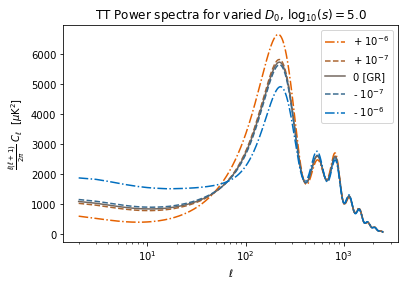

In [5]:
# TT Plots for log S = 5...

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s5, label='+ $10^{-6}$', color='#E56100', linestyle='dashdot')
plt.plot(axis, data_high_short_s5, label='+ $10^{-7}$', color='#AB642F', linestyle='dashed')
plt.plot(axis, data_nominal, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s5, label='- $10^{-7}$', color='#396A8F', linestyle='dashed')
plt.plot(axis, data_low_long_s5, label='- $10^{-6}$', color='#006EBF', linestyle='dashdot')


plt.legend(loc='upper right')
plt.title('TT Power spectra for varied $D_0$, $\log_{10}(s) = 5.0$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
plt.xscale('log')
#plt.savefig("s_5_tt.pdf") 

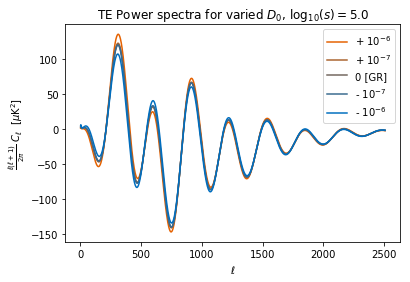

In [6]:
# TE Plots for log S = 5...

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s5te, label='+ $10^{-6}$', color='#E56100')
plt.plot(axis, data_high_short_s5te, label='+ $10^{-7}$', color='#AB642F')
plt.plot(axis, data_nominalte, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s5te, label='- $10^{-7}$', color='#396A8F')
plt.plot(axis, data_low_long_s5te, label='- $10^{-6}$', color='#006EBF')


plt.legend(loc='upper right')
plt.title('TE Power spectra for varied $D_0$, $\log_{10}(s) = 5.0$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
#plt.savefig("s_5_te.pdf")

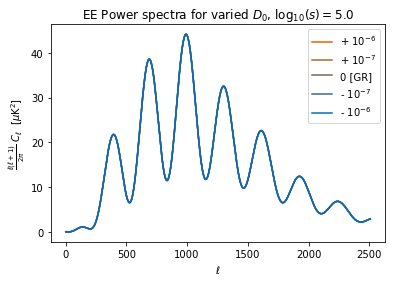

In [7]:
# EE Plots for log S = 5...

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s5ee, label='+ $10^{-6}$', color='#E56100')
plt.plot(axis, data_high_short_s5ee, label='+ $10^{-7}$', color='#AB642F')
plt.plot(axis, data_nominalee, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s5ee, label='- $10^{-7}$', color='#396A8F')
plt.plot(axis, data_low_long_s5ee, label='- $10^{-6}$', color='#006EBF')


plt.legend(loc='upper right')
plt.title('EE Power spectra for varied $D_0$, $\log_{10}(s) = 5.0$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
#plt.savefig("s_5_ee.pdf")

### Log s = 3.5

This is a very slow transition, which starts more or less at the big bang. The rolloff continues well after CMB timescales as well.

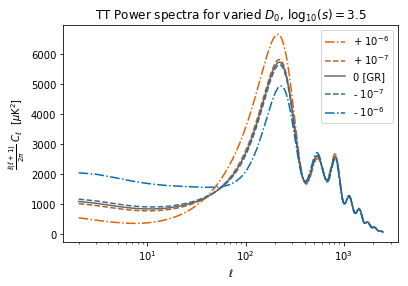

In [8]:
# Plots for log S = 3.5

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s3_5, label='+ $10^{-6}$', color='#E56100', linestyle='dashdot')
plt.plot(axis, data_high_short_s3_5, label='+ $10^{-7}$', color='#AB642F', linestyle='dashed')
plt.plot(axis, data_nominal, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s3_5, label='- $10^{-7}$', color='#396A8F', linestyle='dashed')
plt.plot(axis, data_low_long_s3_5, label='- $10^{-6}$', color='#006EBF', linestyle='dashdot')


plt.legend(loc='upper right')
plt.title('TT Power spectra for varied $D_0$, $\log_{10}(s) = 3.5$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
plt.xscale('log')
#plt.savefig("s_3_5_tt.pdf")

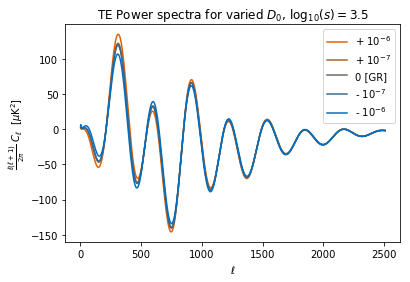

In [9]:
# EE Plots for log S = 5...

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s3_5te, label='+ $10^{-6}$', color='#E56100')
plt.plot(axis, data_high_short_s3_5te, label='+ $10^{-7}$', color='#AB642F')
plt.plot(axis, data_nominalte, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s3_5te, label='- $10^{-7}$', color='#396A8F')
plt.plot(axis, data_low_long_s3_5te, label='- $10^{-6}$', color='#006EBF')


plt.legend(loc='upper right')
plt.title('TE Power spectra for varied $D_0$, $\log_{10}(s) = 3.5$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
#plt.savefig("s_3_5_te.pdf")

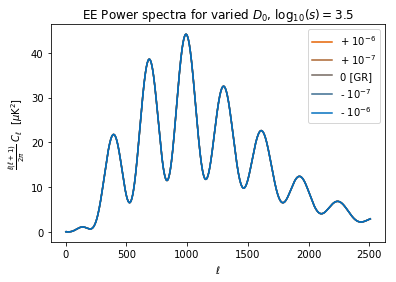

In [10]:
# EE Plots for log S = 5...

# The plots are just a general sanity check...
plt.plot(axis, data_high_long_s3_5ee, label='+ $10^{-6}$', color='#E56100')
plt.plot(axis, data_high_short_s3_5ee, label='+ $10^{-7}$', color='#AB642F')
plt.plot(axis, data_nominalee, label='0 [GR]', color='#72675F')
plt.plot(axis, data_low_short_s3_5ee, label='- $10^{-7}$', color='#396A8F')
plt.plot(axis, data_low_long_s3_5ee, label='- $10^{-6}$', color='#006EBF')


plt.legend(loc='upper right')
plt.title('EE Power spectra for varied $D_0$, $\log_{10}(s) = 3.5$')
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')
#plt.savefig("s_3_5_ee.pdf")

### Log s = 8

This is a very fast transition, with little change before or after CMB timescales. Many of these simulations are very close together, so we have written a fractions option into the plot code.

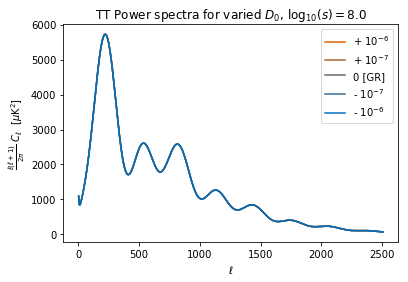

In [11]:
# TT Plots for log S = 8...

# True power spectra or fractional power spectra?
do_fracs = False
do_plots = False

if do_fracs == True:
    plt.plot(axis, (data_high_long_s8-data_nominal)/data_nominal, label='+ $10^{-6}$', color='#E56100', marker='.', ls='none', markersize=1)
    plt.plot(axis, (data_high_short_s8-data_nominal)/data_nominal, label='+ $10^{-7}$', color='#AB642F', marker='.', ls='none', markersize=1)
    plt.plot(axis, (data_nominal-data_nominal)/data_nominal, label='0 [GR]', color='#72675F')
    plt.plot(axis, -1*(data_low_short_s8-data_nominal)/data_nominal, label='- $10^{-7}$', color='#396A8F', marker='.', ls='none', markersize=1)
    plt.plot(axis, -1*(data_low_long_s8-data_nominal)/data_nominal, label='- $10^{-6}$', color='#006EBF', marker='.', ls='none', markersize=1)
    plt.title('Fractional TT power spectra for varied $D_0$, $\log_{10}(s) = 8.0$')
    plt.xlabel('$\ell$')
    plt.ylabel('Fractional Amplitude')
    plt.yscale('log')

else:
    plt.plot(axis, data_high_long_s8, label='+ $10^{-6}$', color='#E56100')
    plt.plot(axis, data_high_short_s8, label='+ $10^{-7}$', color='#AB642F')
    plt.plot(axis, data_nominal, label='0 [GR]', color='#72675F')
    plt.plot(axis, data_low_short_s8, label='- $10^{-7}$', color='#396A8F')
    plt.plot(axis, data_low_long_s8, label='- $10^{-6}$', color='#006EBF')
    plt.title('TT Power spectra for varied $D_0$, $\log_{10}(s) = 8.0$')
    plt.xlabel('$\ell$')
    plt.ylabel(r'$\frac {\ell (\ell+1)} {2 \pi}$ $C_\ell$  [$\mu$K$^2$]')


plt.legend(loc='upper right')

if (do_fracs == True) and (do_plots == True):
    plt.savefig("s_8_tt_frac.pdf")
elif (do_fracs == False) and (do_plots == True):
    plt.savefig("s_8_tt.pdf")
else:
    pass

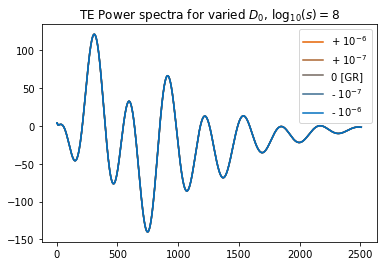

In [12]:
# TE Plots for log S = 8...

# True power spectra or fractional power spectra?
do_fracs = False

if do_fracs == True:
    plt.plot(axis, data_high_long_s8te/data_nominalte, label='+ $10^{-6}$', color='#E56100')
    plt.plot(axis, data_high_short_s8te/data_nominalte, label='+ $10^{-7}$', color='#AB642F')
    plt.plot(axis, data_nominalte/data_nominalte, label='0 [GR]', color='#72675F')
    plt.plot(axis, data_low_short_s8te/data_nominalte, label='- $10^{-7}$', color='#396A8F')
    plt.plot(axis, data_low_long_s8te/data_nominalte, label='- $10^{-6}$', color='#006EBF')
    plt.title('Fractional TE power spectra for varied $D_0$, $\log_{10}(s) = 8$')
    plt.ylim(0.9995,1.0005)
else:
    plt.plot(axis, data_high_long_s8te, label='+ $10^{-6}$', color='#E56100')
    plt.plot(axis, data_high_short_s8te, label='+ $10^{-7}$', color='#AB642F')
    plt.plot(axis, data_nominalte, label='0 [GR]', color='#72675F')
    plt.plot(axis, data_low_short_s8te, label='- $10^{-7}$', color='#396A8F')
    plt.plot(axis, data_low_long_s8te, label='- $10^{-6}$', color='#006EBF')
    plt.title('TE Power spectra for varied $D_0$, $\log_{10}(s) = 8$')


plt.legend(loc='upper right')
#plt.savefig("s_8_te.pdf")

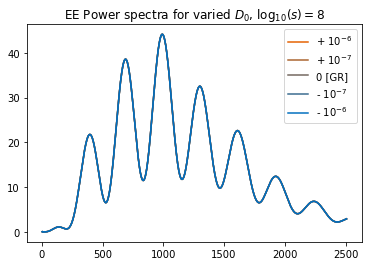

In [13]:
# EE Plots for log S = 8...

# True power spectra or fractional power spectra?
do_fracs = False

if do_fracs == True:
    plt.plot(axis, data_high_long_s8ee/data_nominalee, label='+ $10^{-6}$', color='#E56100')
    plt.plot(axis, data_high_short_s8ee/data_nominalee, label='+ $10^{-7}$', color='#AB642F')
    plt.plot(axis, data_nominalee/data_nominalee, label='0 [GR]', color='#72675F')
    plt.plot(axis, data_low_short_s8ee/data_nominalee, label='- $10^{-7}$', color='#396A8F')
    plt.plot(axis, data_low_long_s8ee/data_nominalee, label='- $10^{-6}$', color='#006EBF')
    plt.title('Fractional EE power spectra for varied $D_0$, $\log_{10}(s) = 8$')

else:
    plt.plot(axis, data_high_long_s8ee, label='+ $10^{-6}$', color='#E56100')
    plt.plot(axis, data_high_short_s8ee, label='+ $10^{-7}$', color='#AB642F')
    plt.plot(axis, data_nominalee, label='0 [GR]', color='#72675F')
    plt.plot(axis, data_low_short_s8ee, label='- $10^{-7}$', color='#396A8F')
    plt.plot(axis, data_low_long_s8ee, label='- $10^{-6}$', color='#006EBF')
    plt.title('EE Power spectra for varied $D_0$, $\log_{10}(s) = 8$')


plt.legend(loc='upper right')
#plt.savefig("s_8_ee.pdf")

## Wrapping up
You now should have a solid grasp on the project, as well as on the methods used up to now. If you're still feeling lost, I reccomend reading some papers or notes from the suggested reading section, but don't stress too much -- there has been a *huge* amount of content in this notebook, and it will take some time to aborb it all.

In the next section, we will explore Fisher Analysis, which is basically the question of "how well can we know something that we think we know?" There will be a good bit of math and coding involved, but it's more of a horizontal leap than a vertical one -- even if you're not solid on the inflation theory here, you should still be able to follow along because the math entirely different. The only thing we will be bringing with us from this section is the data.